In [1]:
from PIL import ImageOps,Image
import matplotlib.pyplot as plt
import numpy as np
import operator
import sys

from IPython.display import display

## Horizon Steam

In [2]:
def horizon(Eneg):
    Eneg = np.transpose(Eneg)
    height, width = Eneg.shape
    seam_dynamic = np.zeros(Eneg.shape)
    backtracker = np.zeros((Eneg.shape))

    
    for x in range(height):
        for y in range(width):
            if x == 0:
                seam_dynamic[x][y] = Eneg[x][y]
                backtracker[x][y] = -1
                
            else:
                if y == 0:
                    minimum = min(seam_dynamic[x - 1][y], seam_dynamic[x - 1][y + 1])
                    if minimum == seam_dynamic[x - 1][y]:
                        backtracker[x][y] = 1
                        
                    else:
                        backtracker[x][y] = 2
                        
                elif y == width - 1:
                    minimum = min(seam_dynamic[x - 1][y], seam_dynamic[x - 1][y - 1])
                    if minimum == seam_dynamic[x - 1][y]:
                        backtracker[x][y] = 1
                        
                    else:
                        backtracker[x][y] = 0
                        
                else:
                    minimum = min(seam_dynamic[x - 1][y - 1], seam_dynamic[x - 1][y], seam_dynamic[x - 1][y + 1])
                    if minimum == seam_dynamic[x - 1][y - 1]:
                        backtracker[x][y] = 0
                        
                    elif minimum == seam_dynamic[x - 1][y]:
                        backtracker[x][y] = 1
                        
                    else:
                        backtracker[x][y] = 2

                seam_dynamic[x][y] = Eneg[x][y]+minimum

    min_num = seam_dynamic[height - 1][0]
    min_index = 0
    for y in range(width):
        if min_num > seam_dynamic[height - 1][y]:
            min_index = y
            min_num = seam_dynamic[height - 1][y]


    y_index = min_index
    x_index = height - 1

    seam = [[None for y in range(2)] for x in range(height)]

    seam[x_index][0] = x_index
    seam[x_index][1] = y_index
    
    while x_index > 0:
        backtrack = backtracker[x_index][y_index]
        
        if backtrack == 0:
            y_index -= 1
            
        elif backtrack != 1:
            y_index += 1
            
        x_index -= 1

        seam[x_index][0] = x_index
        seam[x_index][1] = y_index
                
    return seam

## Vertical Steam

In [3]:
def Verticalseam(E):
    E = np.transpose(E)

    seam = np.zeros(E.shape)

    height, width = E.shape
    h, w = seam.shape
    backtrack = np.zeros((E.shape))

    for y in range(width):
        for x in range(height):

            if y == 0:
                seam[x][y] = E[x][y]
                backtrack[x][y] = -1
                
            else:
                if x == 0:
                    minimum = min(seam[x][y-1], seam[x+1][y-1])
                    if minimum == seam[x][y-1]:
                        backtrack[x][y] = 1
                        
                    else:
                        backtrack[x][y] = 2

                elif x == height - 1:
                    minimum = min(seam[x][y-1], seam[x-1][y-1])
                    if minimum==seam[x][y-1]:
                        backtrack[x][y] = 1
                        
                    else:
                        backtrack[x][y] = 0
                        
                else:
                    minimum = min(seam[x][y-1], seam[x-1][y-1], seam[x+1][y-1])
                    if minimum == seam[x][y-1]:
                        backtrack[x][y] = 1
                        
                    elif minimum == seam[x-1][y-1]:
                        backtrack[x][y] = 0
                        
                    else:
                        backtrack[x][y] = 2


                seam[x][y] = minimum + E[x][y]

    min_num = seam[0][width-1]
    min_index = 0
    
    for x in range(height):
        if min_num > seam[x][width-1]:
            min_index = x
            min_num = seam[x][width-1]



    seam = np.zeros((width,2))


    x_index = min_index
    y_index = width-1
    seam[y_index][0] = x_index
    seam[y_index][1] = y_index
    
    while y_index > 0:
        backtracker = backtrack[x_index][y_index]
        
        if backtracker == 2:
            x_index = x_index + 1
            
        elif backtracker != 1:
            x_index = x_index-1
            
        y_index = y_index-1

        seam[y_index][0] = x_index
        seam[y_index][1] = y_index
        
    return seam


## Crop Image and Save

In [4]:
def imgcrop(q, ys, image):
    i = q[0]
    im = image
    
    for e in range(len(ys)-1):

        #u= ys[e] + ys[e+1]
        ymax = max(ys[e+1])
        ymin = min(ys[e])

        mat = 255 * np.ones(((ymax-ymin+1), 2733, 3))
        for x, yy in enumerate(zip(ys[e], ys[e+1])):
            mat[yy[0] - ymin:yy[1] - ymin, x, :] = im[yy[0]:yy[1], x, :]

        binary = np.logical_or(np.logical_or(mat[:, :, 0] < 175, mat[:, :, 1] < 175), mat[:, : ,2] < 175)
        points = np.asarray(np.where(binary == True), dtype='int32')

        x1 = np.min(points[1, :])
        x2 = np.max(points[1, :])

        y1=np.min(points[0,:])
        y2 = np.max(points[0, :])
        mat=mat[y1:y2+1,x1:x2+1,:]
        img=Image.fromarray(mat.astype('uint8'))
        img.save("new{}.jpeg".format(e))

(411, 645)


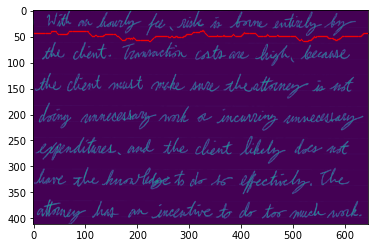

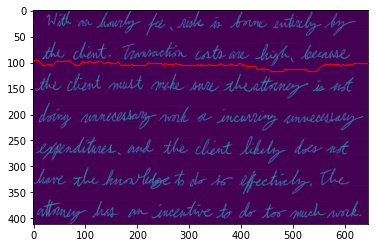

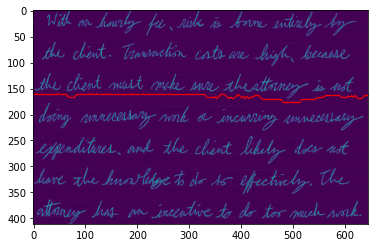

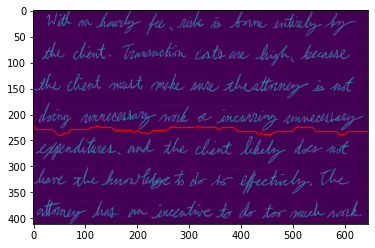

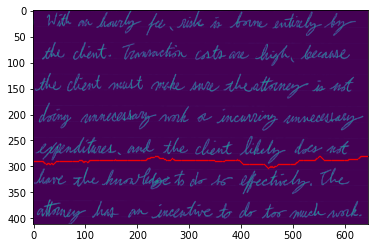

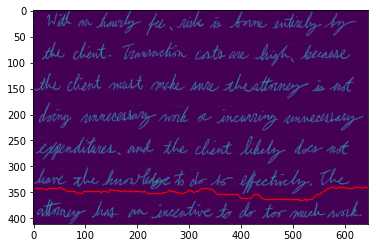

In [5]:
image = Image.open("text.jpg")
im = np.array(image)

gray = image.convert("L")
image = np.asarray(np.invert(gray))

E = np.square(np.asarray(image, dtype="float32") / 255.0)
height, width = E.shape

print(E.shape)

x = []
d1 = {}
q = []
d = []
ys = []
flag = 1
seamx = []
seamy = []
order = []
seamline = []

y = []
E1 = E.copy()

for i in range(height):
    for j in range(width):
        if image[i][j] > 100:
            for k in range(-50,50):
                if j + k >= 0 and j + k < width:
                    E1[i][j+k] = 255 * 255




for itr in range(20):
    for x1,y1 in zip(x,y):

        #if y1>2 and y1<height-2:
           # E1[int(y1-2):int(y1-2)+3,int(x1)]=255*255
        E1[int(y1-2), int(x1)] = 255 * 255
        E1[int(y1-1), int(x1)] = 255 * 255
        E1[int(y1), int(x1)] = 255 * 255

        if(y1 + 1 < height):
            E1[int(y1+1), int(x1)] = 255 * 255
            
        if (y1 + 2 < height):
            E1[int(y1+2), int(x1)] = 255 * 255

    seam = horizon(E1)
    x = []
    y = []

    flag = 0
    for i in seam:
        x.append(i[0])
        y.append(i[1])



    if itr == 0:
        seamx.append(x)
        seamy.append(y)
        
    else:
        flag = 1


        for y1 in seamy:
            a = np.mean(np.abs(np.array(y)-np.array(y1)))
            if a < 35:
                flag = 0
                break

        if flag == 1:
            seamx.append(x)
            seamy.append(y)


for i in range(len(seamy)):
    d1[i] = np.mean(seamy[i])
    
d1 = sorted(d1.items(), key=(operator.itemgetter(1)))


for i in range(len(seamy)):
    d.append(seamy[i])

for i in d1:
    q.append((seamx[i[0]]))
    ys.append(d[i[0]])
    plt.figure()
    plt.imshow(E)
    plt.scatter(seamx[i[0]], d[i[0]], c='r', s=0.1)



imgcrop(q, ys, im)
plt.show()

In [6]:
"done"

'done'